In [25]:
!rocm-smi



========================================= ROCm System Management Interface =========================================
=================================================== Concise Info ===================================================
Device  Node  IDs              Temp    Power  Partitions          SCLK    MCLK     Fan  Perf  PwrCap  VRAM%  GPU%  
              (DID,     GUID)  (Edge)  (Avg)  (Mem, Compute, ID)                                                   
0       3     0x740f,   32693  54.0°C  44.0W  N/A, N/A, 0         800Mhz  1600Mhz  0%   auto  300.0W  0%     0%    
1       2     0x740f,   42924  51.0°C  41.0W  N/A, N/A, 0         800Mhz  1600Mhz  0%   auto  300.0W  1%     0%    
=============================================== End of ROCm SMI Log ================================================


In [26]:
!lscpu 

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         48 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  128
  On-line CPU(s) list:   0-127
Vendor ID:               AuthenticAMD
  Model name:            AMD EPYC 7V13 64-Core Processor
    CPU family:          25
    Model:               1
    Thread(s) per core:  1
    Core(s) per socket:  64
    Socket(s):           2
    Stepping:            1
    Frequency boost:     enabled
    CPU max MHz:         2450.0000
    CPU min MHz:         1500.0000
    BogoMIPS:            4890.49
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall n
                         x mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_go
                         od nopl nonstop_tsc cpuid extd_apicid aperfmperf rapl p
                         ni pclmulqdq monitor ssse3

In [27]:
import torch

# check enabled GPU
print(torch.cuda.is_available())
for i in range(torch.cuda.device_count()):
   print(torch.cuda.get_device_properties(i))

True
_CudaDeviceProperties(name='AMD Instinct MI210', major=9, minor=0, gcnArchName='gfx90a:sramecc+:xnack-', total_memory=65520MB, multi_processor_count=104, uuid=39653864-3266-6662-3830-396539343634, L2_cache_size=8MB)
_CudaDeviceProperties(name='AMD Instinct MI210', major=9, minor=0, gcnArchName='gfx90a:sramecc+:xnack-', total_memory=65520MB, multi_processor_count=104, uuid=35646464-3632-6239-6164-613031343863, L2_cache_size=8MB)


In [28]:
version = 4.6

In [29]:
filename = f"plots/{version:.1f}/learning-rate.csv"

filename

'plots/4.6/learning-rate.csv'

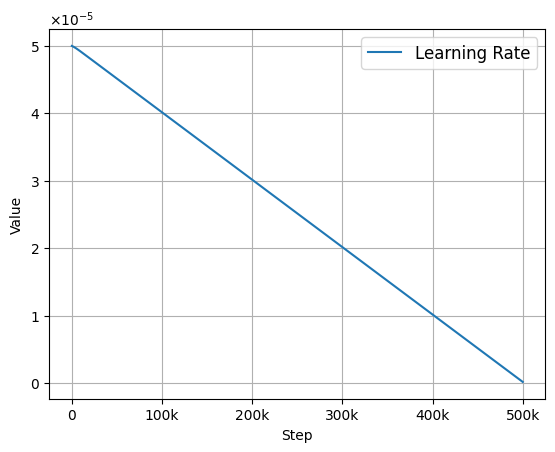

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# Define a formatter function
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else str(int(x))


df = pd.read_csv(filename)


# Filter to skip first 10,000 steps
# df = df[df['Step'] > 1000]

# Extract x and y
x = df['Step']
y = df['Value']

# Apply exponential moving average (EMA) for smoothing
smoothing_factor = 0.6  # Adjust this between 0 (no smoothing) and 1 (heavy smoothing)
y_smooth = y.ewm(alpha=1 - smoothing_factor).mean()

# Plot
plt.plot(x, y_smooth, label='Learning Rate')

# # Annotate last point
# last_x = x.iloc[-1]
# last_y = y.iloc[-1]
# plt.text(
#     last_x, last_y, f'{last_y:.4f}',  # formatted value
#     fontsize=10, fontweight='bold', color='black',
#     verticalalignment='top', horizontalalignment='right'
# )

# Format x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Format y-axis
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Custom legend
plt.legend(loc='upper right', fontsize=12, frameon=True)

# Labels and layout
plt.xlabel('Step')
plt.ylabel('Value')
# plt.title('Learning Rate Curve')

plt.grid(True)

plt.savefig(f"plots/{version:.1f}/learning-rate.pdf", format='pdf')  # Save as PDF for LaTeX

plt.show()